# Helstrom : QuantumCircuit

# Probability of success : quantum simulator

Here there is a quantum version where the circuits are built based on the experiments

We have the status $|0>$ (status $0$) and $|\Psi>$ (status $1$) such that

$$ c = <0|\Psi> $$

In the other hand, we want to rotate them so:
- $|0>    \rightarrow cos(\alpha)|0> + sin(\alpha)|1>$
- $|\Psi> \rightarrow cos(\alpha)|0> - sin(\alpha)|1>$

using the generic operator $U$:

$$
U(\theta, \phi, \lambda) =
\begin{pmatrix}
  \cos(\theta)          & -e^{i\lambda}\sin(\theta) \\
  e^{i\phi}\sin(\theta) & e^{i(\phi+\lambda)}\cos(\theta)
\end{pmatrix}
$$
   
Acording the previous exercise our POVM is
- $E_0 = \begin{pmatrix}1 & 0 \\0 & 0\end{pmatrix}$
- $E_1 = \begin{pmatrix}0 & 0 \\0 & 1\end{pmatrix}$

Expressed in the eigenbasis of $\Gamma$. The generic expression for those vectors is quite complex so let's see some particular cases

### Case #1

$\alpha = \frac{\pi}{4}, \eta_0=\eta_1=\frac{1}{2}$

In this case the eigenvectors are:
- $\frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}$
- $\frac{1}{\sqrt{2}}\begin{pmatrix}-1\\1\end{pmatrix}$

So the measurement process should be the following:
- Because we can only produce status $|0>$ and we need $cos(\alpha)|0>+sin(\alpha)|1>$ and $cos(\alpha)|0>-sin(\alpha)|1>$, the first operation will be a rotation $U_1(-,-,-)$ 
- Once it is in this state, becuase we can only measure in the computation basis and we want to measure with the eigenbasis of $\Gamma$, we have to do a second rotation $U_2(-,-,-)$ in the oposite direction(?)

Which are those rotations?

**Rotation $U_1$**

_First doubt_ : do we need a single U for being able to do the changes (using **the same U**) of:
- $|0>    \rightarrow cos(\alpha)|0>+sin(\alpha)|1>$
- $|\Psi> \rightarrow cos(\alpha)|0>-sin(\alpha)|1>$

**Rotation $U_2$**

Change of basis:

$$
\Bigg[ 
  \begin{pmatrix}1\\0\end{pmatrix}, 
  \begin{pmatrix}0\\1\end{pmatrix}
\Bigg]
\overset{U_2(\frac{\pi}{2},0,0)}{\Longrightarrow}
\Bigg[ 
  \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix}, 
  \frac{1}{\sqrt{2}}\begin{pmatrix}-1\\1\end{pmatrix}
\Bigg]
$$

$$
U_2\bigg( \frac{\pi}{2},0,0 \bigg) = 
\begin{pmatrix}
  \cos(\pi/2) & -\sin(\pi/2) \\
  \sin(\pi/2) & \cos(\pi/2)
\end{pmatrix} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
  1 & -1 \\
  1 & 1
\end{pmatrix}
$$


{'0': 858, '1': 142}
c : 0.707107 => theta : 0.392699
>>> Formula
P(0|0) = 1/2*(1+sin(2*alfa)) = 0.853553
P(1|0) = 1/2*(1+sin(2*alfa)) = 0.146447
>>> Simulation
{'0': 858, '1': 142}
P(0|0) = 0.858000
P(1|0) = 0.142000


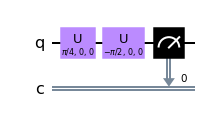

In [50]:
from qiskit import(
  QuantumCircuit,
  QuantumRegister,
  ClassicalRegister,
  execute,
  Aer
)
import math
from numpy import pi

# TODO : this should be a param
c=1/math.sqrt(2)
alfa=math.acos(c)/2

def getSuccessHelstrom():
    """ Execute a serie of experiments.
    
    Let's see the success using Helstrom.
    We have two states |0> and |Phi> such that <0|Phi> = c (real)
    The first step is to rotate the states
    - |0>   : cos(theta)|0> + sin(theta)|1>
    - |Phi> : cos(theta)|0> - sin(theta)|1>
    
    and then we measure with the eigenbasis of Gamma
    - 1/sqrt(2) ( 1, 1)
    - 1/sqrt(2) (-1, 1)
    and that means perform a rotation so we can measure in the computational basis.
    """
    simulator = Aer.get_backend('qasm_simulator')
    
    qreg_q = QuantumRegister(1, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
 
    # Set the status |0> in cos(theta)|0> + sin(theta)|1>
    circuit.u(2*alfa,0,0,qreg_q[0])
    
    # Now perform a U3 rotation to measure in the eigenbasis of Gamma
    circuit.u(-pi/2,0,0,qreg_q[0])
    
    # Map the quantum measurement to the classical bits
    circuit.measure(qreg_q, creg_c)
            
    job = execute(circuit, simulator, shots=1000)
    result = job.result()
    
    return circuit, result
    
circuit, result=getSuccessHelstrom()  

counts = result.get_counts(circuit)
print (counts)

print ("c : %f => theta : %f" % (c, alfa))

print (">>> Formula")
print ("P(0|0) = 1/2*(1+sin(2*alfa)) = %f" % ((1/2)*(1+math.sin(2*alfa))))
print ("P(1|0) = 1/2*(1+sin(2*alfa)) = %f" % ((1/2)*(1-math.sin(2*alfa))))

print (">>> Simulation")
print (counts)
print ("P(0|0) = %f" % (counts['0']/(counts['0'] + counts['1'])))
print ("P(1|0) = %f" % (counts['1']/(counts['0'] + counts['1'])))

circuit.draw()
